In [1]:
using PyPlot
using LinearAlgebra

Suppose we want to solve a simple optimization problem over $\mathbb{R}^d$ with objective function
$$ f(x) = \frac{1}{2} \| x \|^2. $$
Here, the gradient is
$$ f'(x) = x. $$

In [2]:
function grad_f(x)
    return x
end

grad_f (generic function with 1 method)

Suppose that our stochastic objective samples are of the form
$$\tilde f(x) = \frac{1}{2} \| x \|^2 + x^T z$$
where $z \sim N(0,\sqrt{d} \cdot I)$ is a standard Gaussian random variable with expected norm-squared $1$. Then our gradient samples will be of the form
$$ \nabla \tilde f(x) = x + z. $$

In [3]:
function sample_grad_f(x)
    return x + randn(length(x)) / sqrt(length(x))
end

sample_grad_f (generic function with 1 method)

In [4]:
function gradient_descent(x0, alpha, num_iters)
    dist_to_optimum = zeros(num_iters)
    x = x0
    for t = 1:num_iters
        x = x - alpha * grad_f(x)
        dist_to_optimum[t] = norm(x)
    end
    return dist_to_optimum
end

function stochastic_gradient_descent(x0, alpha, num_iters)
    dist_to_optimum = zeros(num_iters)
    x = x0
    for t = 1:num_iters
        x = x - alpha * sample_grad_f(x)
        dist_to_optimum[t] = norm(x)
    end
    return dist_to_optimum
end

stochastic_gradient_descent (generic function with 1 method)

In [5]:
x0 = [5.0];
alpha = 0.1;
num_iters = 1000;
gd_dist = gradient_descent(x0, alpha, num_iters);
sgd_dist = stochastic_gradient_descent(x0, alpha, num_iters);

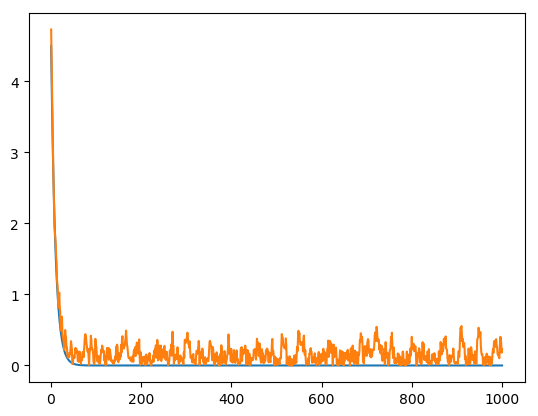

In [6]:
plot(1:num_iters, gd_dist, 1:num_iters, sgd_dist);

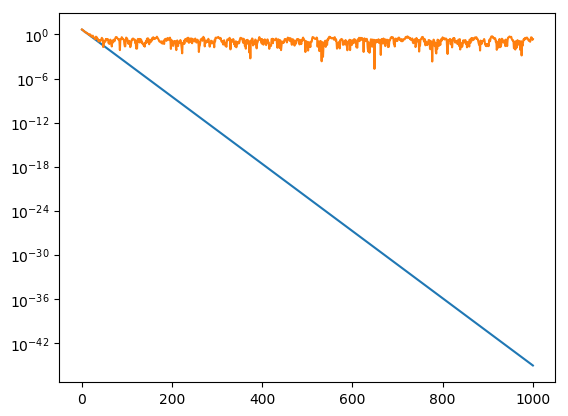

In [7]:
semilogy(1:num_iters, gd_dist, 1:num_iters, sgd_dist);

In [8]:
x0 = 2 * randn(100);
alpha = 0.1;
num_iters = 5000;
gd_dist = gradient_descent(x0, alpha, num_iters);
sgd_dist = stochaswtic_gradient_descent(x0, alpha, num_iters);

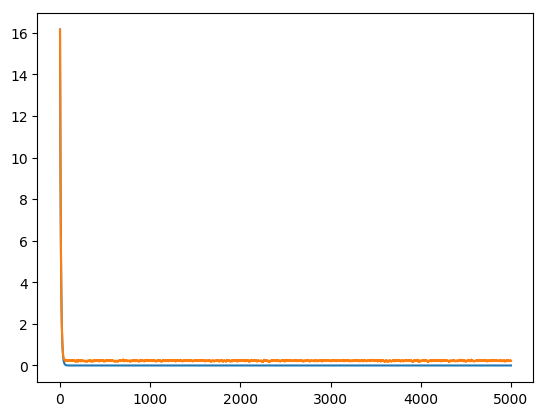

In [9]:
plot(1:num_iters, gd_dist, 1:num_iters, sgd_dist);

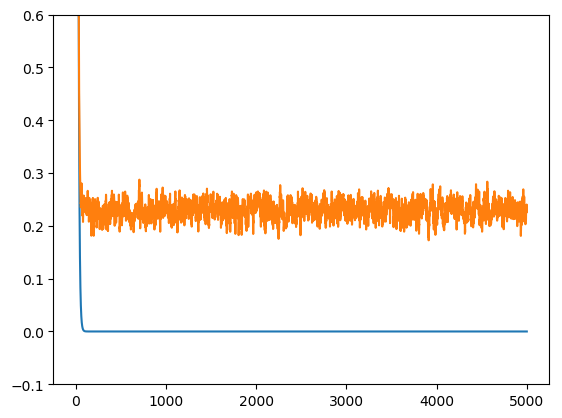

In [10]:
plot(1:num_iters, gd_dist, 1:num_iters, sgd_dist);
ylim([-0.1,0.6]);

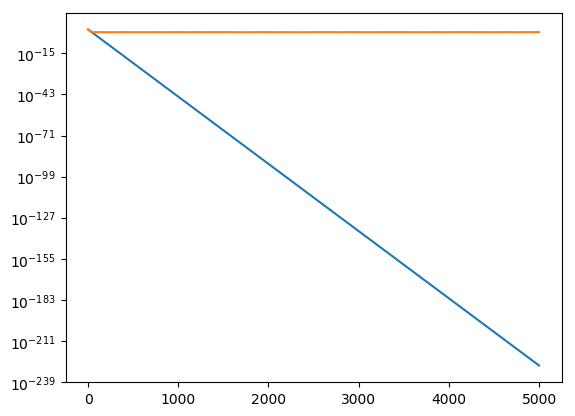

In [11]:
semilogy(1:num_iters, gd_dist, 1:num_iters, sgd_dist);